In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.datasets import cifar10

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
(train_X,train_y),(test_X,test_y) = cifar10.load_data()

In [13]:
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

In [14]:
num_classes = 10
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [16]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Compute quantities required for featurewise normalization
datagen.fit(train_X)

# Fit the model on the batches generated by datagen.flow()
history = model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    epochs=20, validation_data=(test_X, test_y))

Epoch 1/20
391/391 [==============================] - 274s 693ms/step - loss: 1.8213 - accuracy: 0.3459 - val_loss: 3.2295 - val_accuracy: 0.1794
Epoch 2/20
391/391 [==============================] - 269s 688ms/step - loss: 1.4115 - accuracy: 0.4967 - val_loss: 1.3565 - val_accuracy: 0.5058
Epoch 3/20
391/391 [==============================] - 269s 689ms/step - loss: 1.2435 - accuracy: 0.5641 - val_loss: 1.3498 - val_accuracy: 0.5085
Epoch 4/20
391/391 [==============================] - 277s 710ms/step - loss: 1.1246 - accuracy: 0.6087 - val_loss: 1.2126 - val_accuracy: 0.5914
Epoch 5/20
391/391 [==============================] - 271s 693ms/step - loss: 1.0331 - accuracy: 0.6464 - val_loss: 0.9777 - val_accuracy: 0.6703
Epoch 6/20
391/391 [==============================] - 269s 688ms/step - loss: 0.9753 - accuracy: 0.6682 - val_loss: 1.0384 - val_accuracy: 0.6341
Epoch 7/20
391/391 [==============================] - 277s 710ms/step - loss: 0.9229 - accuracy: 0.6863 - val_loss: 0.9041 -

In [19]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 12s 38ms/step - loss: 0.6282 - accuracy: 0.7877
Test Accuracy: 78.77%


In [ ]:
pred_y = model.predict(test_X)

In [21]:
predicted_labels = np.argmax(pred_y, axis=1)

In [ ]:
y_test = np.argmax(test_y, axis=1)

In [23]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [24]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

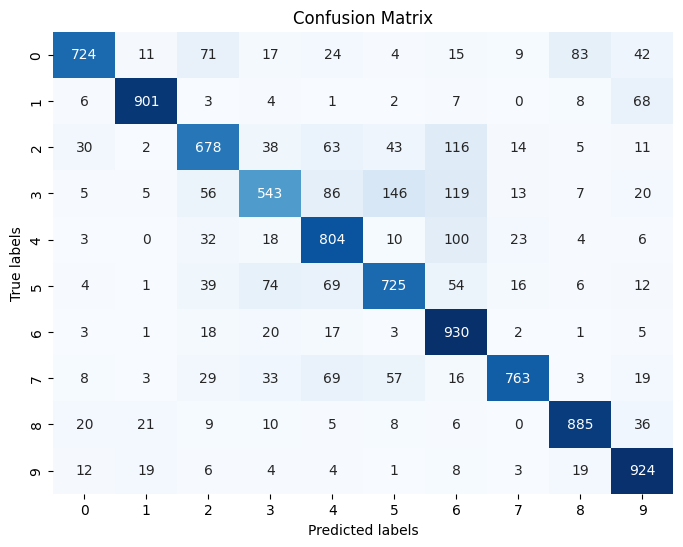

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()